In [6]:
import pandas as pd
import numpy as np
import ast
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Yelp Business Data

In [7]:
# getting data
if False:
    from yelpapi import YelpAPI
    yelp_api = YelpAPI("") # Insert Key Here
    df = pd.DataFrame()
    for i in np.arange(0, 950, 50):
        results = yelp_api.search_query(location = "San Francisco", limit = 50, offset = i)
        df = pd.concat([df, pd.DataFrame(results['businesses'])])
        
    businesses = df.reset_index(drop = True)
    businesses.to_csv("yelp_sf.csv")

In [8]:
business_data = pd.read_csv('yelp_sf.csv', index_col = 0)
business_data['merge_address'] = business_data['location'].apply(lambda x: ast.literal_eval(x).get('address1')).str.lower()
business_data.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,merge_address
0,wGl_DyNxSv8KUtYgiuLhmA,bi-rite-creamery-san-francisco,Bi-Rite Creamery,https://s3-media4.fl.yelpcdn.com/bphoto/k4ild0...,False,https://www.yelp.com/biz/bi-rite-creamery-san-...,9842,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 37.761591, 'longitude': -122.425717}",['delivery'],$$,"{'address1': '3692 18th St', 'address2': None,...",1.415627e+10,(415) 626-5600,946.386739,3692 18th st
1,lJAGnYzku5zSaLnQ_T6_GQ,brendas-french-soul-food-san-francisco-6,Brenda's French Soul Food,https://s3-media4.fl.yelpcdn.com/bphoto/VJ865E...,False,https://www.yelp.com/biz/brendas-french-soul-f...,11628,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 37.7829016035273, 'longitude': -1...",['delivery'],$$,"{'address1': '652 Polk St', 'address2': '', 'a...",1.415346e+10,(415) 345-8100,2885.389131,652 polk st
2,WavvLdfdP6g8aZTtbBQHTw,gary-danko-san-francisco,Gary Danko,https://s3-media3.fl.yelpcdn.com/bphoto/eyYUz3...,False,https://www.yelp.com/biz/gary-danko-san-franci...,5676,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 37.80587, 'longitude': -122.42058}",[],$$$$,"{'address1': '800 N Point St', 'address2': '',...",1.415749e+10,(415) 749-2060,5191.341803,800 n point st
3,ri7UUYmx21AgSpRsf4-9QA,tartine-bakery-san-francisco-3,Tartine Bakery,https://s3-media3.fl.yelpcdn.com/bphoto/4lEDYd...,False,https://www.yelp.com/biz/tartine-bakery-san-fr...,8384,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 37.76131, 'longitude': -122.42431}",['delivery'],$$,"{'address1': '600 Guerrero St', 'address2': ''...",1.415487e+10,(415) 487-2600,1087.638933,600 guerrero st
4,76smcUUGRvq3k1MVPUXbnA,mitchells-ice-cream-san-francisco,Mitchells Ice Cream,https://s3-media2.fl.yelpcdn.com/bphoto/TbzCFI...,False,https://www.yelp.com/biz/mitchells-ice-cream-s...,4445,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 37.744221, 'longitude': -122.422791}","['pickup', 'delivery']",$,"{'address1': '688 San Jose Ave', 'address2': '...",1.415648e+10,(415) 648-2300,2209.260424,688 san jose ave


In [9]:
health_business = pd.read_csv('bus.csv')
health_business['merge_address'] = health_business['address'].str.lower()
health_business.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,merge_address
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,3279 22nd st
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,pier 39 k-106-b
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,475 06th st
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,1566 carroll ave
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,2200 jerrold ave ste c


In [10]:
merged = business_data.merge(health_business, on = 'merge_address')
merged['display_address'] = merged['location'].apply(lambda x: ast.literal_eval(x).get('display_address')).apply(lambda x: ", ".join(x))
merged.head()

,id,alias,name_x,image_url,is_closed,url,review_count,categories,rating,coordinates,...,business id column,name_y,address,city,state,postal_code,latitude,longitude,phone_number,display_address
0,wGl_DyNxSv8KUtYgiuLhmA,bi-rite-creamery-san-francisco,Bi-Rite Creamery,https://s3-media4.fl.yelpcdn.com/bphoto/k4ild0...,False,https://www.yelp.com/biz/bi-rite-creamery-san-...,9842,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 37.761591, 'longitude': -122.425717}",...,23865,Bi-Rite Creamery,3692 18th St,San Francisco,CA,94110,37.761504,-122.425817,-9999,"3692 18th St, San Francisco, CA 94110"
1,76smcUUGRvq3k1MVPUXbnA,mitchells-ice-cream-san-francisco,Mitchells Ice Cream,https://s3-media2.fl.yelpcdn.com/bphoto/TbzCFI...,False,https://www.yelp.com/biz/mitchells-ice-cream-s...,4445,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 37.744221, 'longitude': -122.422791}",...,5032,MITCHELLS ICE CREAM,688 SAN JOSE Ave,San Francisco,CA,94110,37.744122,-122.422722,14155642300,"688 San Jose Ave, San Francisco, CA 94110"
2,oT08T3Vpn1I7jDmrBBRMTw,house-of-prime-rib-san-francisco,House of Prime Rib,https://s3-media4.fl.yelpcdn.com/bphoto/HLrjaM...,False,https://www.yelp.com/biz/house-of-prime-rib-sa...,7912,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 37.79338, 'longitude': -122.4225}",...,3350,House of Prime Rib,1906 Van Ness Ave,San Francisco,CA,94109,37.793338,-122.422827,-9999,"1906 Van Ness Ave, San Francisco, CA 94109"
3,eYXwVR4mMAjzkJnm5wneHQ,burma-superstar-san-francisco-2,Burma Superstar,https://s3-media4.fl.yelpcdn.com/bphoto/Rt-zOS...,False,https://www.yelp.com/biz/burma-superstar-san-f...,7145,"[{'alias': 'burmese', 'title': 'Burmese'}]",4.0,"{'latitude': 37.782787322998, 'longitude': -12...",...,1977,BURMA SUPERSTAR RESTAURANT,309 CLEMENT St,San Francisco,CA,94118,37.783004,-122.462539,-9999,"309 Clement St, San Francisco, CA 94118"
4,2XQm-uFcTS7oc8MFP-8olA,b-patisserie-san-francisco-2,B Patisserie,https://s3-media4.fl.yelpcdn.com/bphoto/bSlfEG...,False,https://www.yelp.com/biz/b-patisserie-san-fran...,3006,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 37.787873, 'longitude': -122.440882}",...,71696,B. Patisserie LLC,2821 CALIFORNIA St,San Francisco,CA,94115,37.788014,-122.440756,-9999,"2821 California St, San Francisco, CA 94115"


In [11]:
subset = ['name_x', 'categories', 'display_address', 'rating', 'review_count', 'price', 'latitude', 'longitude', 'business id column']
merged_subset = merged.copy()[subset]
merged_subset.head()

,name_x,categories,display_address,rating,review_count,price,latitude,longitude,business id column
0,Bi-Rite Creamery,"[{'alias': 'icecream', 'title': 'Ice Cream & F...","3692 18th St, San Francisco, CA 94110",4.5,9842,$$,37.761504,-122.425817,23865
1,Mitchells Ice Cream,"[{'alias': 'icecream', 'title': 'Ice Cream & F...","688 San Jose Ave, San Francisco, CA 94110",4.5,4445,$,37.744122,-122.422722,5032
2,House of Prime Rib,"[{'alias': 'tradamerican', 'title': 'American ...","1906 Van Ness Ave, San Francisco, CA 94109",4.0,7912,$$$,37.793338,-122.422827,3350
3,Burma Superstar,"[{'alias': 'burmese', 'title': 'Burmese'}]","309 Clement St, San Francisco, CA 94118",4.0,7145,$$,37.783004,-122.462539,1977
4,B Patisserie,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...","2821 California St, San Francisco, CA 94115",4.5,3006,$$,37.788014,-122.440756,71696


In [12]:
merged_subset['type'] = merged_subset['categories'].apply(lambda x: ast.literal_eval(x)[0].get('title'))

In [13]:
review_data = merged_subset.drop(columns = 'categories').rename(columns = {'name_x':'name', 'business id column':'bid'})
review_data.head()

,name,display_address,rating,review_count,price,latitude,longitude,bid,type
0,Bi-Rite Creamery,"3692 18th St, San Francisco, CA 94110",4.5,9842,$$,37.761504,-122.425817,23865,Ice Cream & Frozen Yogurt
1,Mitchells Ice Cream,"688 San Jose Ave, San Francisco, CA 94110",4.5,4445,$,37.744122,-122.422722,5032,Ice Cream & Frozen Yogurt
2,House of Prime Rib,"1906 Van Ness Ave, San Francisco, CA 94109",4.0,7912,$$$,37.793338,-122.422827,3350,American (Traditional)
3,Burma Superstar,"309 Clement St, San Francisco, CA 94118",4.0,7145,$$,37.783004,-122.462539,1977,Burmese
4,B Patisserie,"2821 California St, San Francisco, CA 94115",4.5,3006,$$,37.788014,-122.440756,71696,Bakeries


### Selecting only inspections that are in our subset

In [14]:
ins = pd.read_csv('ins.csv')
ins['bid'] = ins['iid'].str.extract(r'(\d+)').astype(int)
ins['timestamp'] = pd.to_datetime(ins.date)
ins['year'] = ins['timestamp'].dt.year
select_ins = ins.loc[[i in review_data.bid.unique() for i in ins['bid']], :]
select_ins.to_csv('inspections.csv', index = False)

### Creating new ratings as a function of review count and health score and price

In [15]:
health_ins = select_ins[select_ins['score']>0].merge(review_data, on = 'bid')
health_ins

,iid,date,score,type_x,bid,timestamp,year,name,display_address,rating,review_count,price,latitude,longitude,type_y
0,100504_20190411,04/11/2019 12:00:00 AM,88,Routine - Unscheduled,100504,2019-04-11,2019,Holy Gelato!,"1392 9th Ave, San Francisco, CA 94122",4.5,1100,$$,-9999.000000,-9999.000000,Gelato
1,100992_20190822,08/22/2019 12:00:00 AM,88,Routine - Unscheduled,100992,2019-08-22,2019,District Tea,"2154 Mission St, San Francisco, CA 94110",4.5,324,$$,-9999.000000,-9999.000000,Bubble Tea
2,102398_20190813,08/13/2019 12:00:00 AM,90,Routine - Unscheduled,102398,2019-08-13,2019,Beit Rima,"138 Church St, San Francisco, CA 94114",4.5,549,$$,-9999.000000,-9999.000000,Arabic
3,1043_20171116,11/16/2017 12:00:00 AM,87,Routine - Unscheduled,1043,2017-11-16,2017,Central Coffee Tea & Spice,"1696 Hayes St, San Francisco, CA 94117",4.5,319,$,37.774198,-122.444214,Cafes
4,1043_20180928,09/28/2018 12:00:00 AM,83,Routine - Unscheduled,1043,2018-09-28,2018,Central Coffee Tea & Spice,"1696 Hayes St, San Francisco, CA 94117",4.5,319,$,37.774198,-122.444214,Cafes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,99298_20190605,06/05/2019 12:00:00 AM,84,Routine - Unscheduled,99298,2019-06-05,2019,Marugame Udon,"3251 20th Ave, Space 184, San Francisco, CA 94132",4.0,2129,$$,-9999.000000,-9999.000000,Japanese
1816,99298_20190605,06/05/2019 12:00:00 AM,84,Routine - Unscheduled,99298,2019-06-05,2019,Gram Cafe & Pancakes,"3251 20th Ave, Ste 172, San Francisco, CA 94132",4.0,931,$$,-9999.000000,-9999.000000,Pancakes
1817,99421_20190729,07/29/2019 12:00:00 AM,73,Routine - Unscheduled,99421,2019-07-29,2019,Hong Kong Lounge,"5322 Geary Blvd, San Francisco, CA 94121",3.5,1726,$$,-9999.000000,-9999.000000,Dim Sum
1818,99740_20190425,04/25/2019 12:00:00 AM,96,Routine - Unscheduled,99740,2019-04-25,2019,Plain Jane,"1000 Guerrero St, San Francisco, CA 94110",4.5,442,$$,-9999.000000,-9999.000000,Breakfast & Brunch


In [16]:
avg_health = health_ins.groupby('bid')['score'].mean()
avg_health

bid
31        95.000000
48        90.500000
58        75.666667
95        88.000000
121       89.500000
            ...    
99740     96.000000
99761     70.000000
100504    88.000000
100992    88.000000
102398    90.000000
Name: score, Length: 700, dtype: float64

In [17]:
review_data.merge(avg_health, left_on = 'bid', right_index = True)

,name,display_address,rating,review_count,price,latitude,longitude,bid,type,score
0,Bi-Rite Creamery,"3692 18th St, San Francisco, CA 94110",4.5,9842,$$,37.761504,-122.425817,23865,Ice Cream & Frozen Yogurt,96.000000
1,Mitchells Ice Cream,"688 San Jose Ave, San Francisco, CA 94110",4.5,4445,$,37.744122,-122.422722,5032,Ice Cream & Frozen Yogurt,96.000000
2,House of Prime Rib,"1906 Van Ness Ave, San Francisco, CA 94109",4.0,7912,$$$,37.793338,-122.422827,3350,American (Traditional),96.000000
3,Burma Superstar,"309 Clement St, San Francisco, CA 94118",4.0,7145,$$,37.783004,-122.462539,1977,Burmese,92.500000
4,B Patisserie,"2821 California St, San Francisco, CA 94115",4.5,3006,$$,37.788014,-122.440756,71696,Bakeries,89.750000
...,...,...,...,...,...,...,...,...,...,...
779,Philz Coffee,"5 Embarcadero Ctr, San Francisco, CA 94111",4.0,409,$,-9999.000000,-9999.000000,98657,Coffee & Tea,93.000000
781,Amitis Café,"800 Masonic Ave, San Francisco, CA 94117",4.5,207,$$,-9999.000000,-9999.000000,83687,Poke,89.500000
782,The Dark Horse Inn,"942 Geneva Ave, San Francisco, CA 94112",4.5,335,$$,37.716105,-122.440422,67489,Bars,94.000000
783,King's Thai Cuisine 1,"639 Clement St, San Francisco, CA 94118",3.5,973,$$,37.782833,-122.466150,1350,Thai,79.000000


<AxesSubplot:xlabel='score', ylabel='rating'>

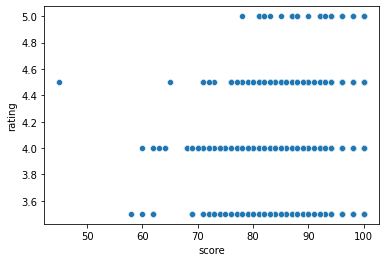

In [18]:
sns.scatterplot(x = health_ins['score'], y = health_ins['rating'])

In [19]:
def rating_manipulate(curr_rating, review_count, price, score):
    return None 


Guidelines - 
- If bad healthscore, bring down
- If bad healthscore and expensive bring even further
- If good healthscore, bring up 
- If good healthscore cheap, bring up 
- If good healthscore 

In [20]:
health_ins['rating'].value_counts()

4.0    1089
4.5     505
3.5     196
5.0      30
Name: rating, dtype: int64

In [23]:
five = health_ins[health_ins['rating'] == 5]
fourpointfive = health_ins[health_ins['rating'] == 4.5] 
four = health_ins[health_ins['rating'] == 4] 
threepointfive = health_ins[health_ins['rating'] == 3.5] 

<AxesSubplot:xlabel='score', ylabel='review_count'>

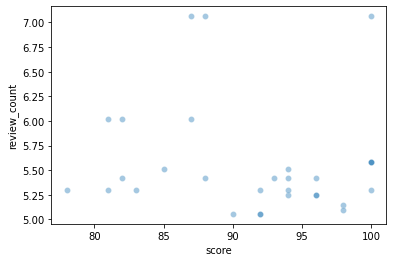

In [38]:
sns.scatterplot(x = five.score, y = np.log(five.review_count), alpha = 0.4)

<AxesSubplot:xlabel='score', ylabel='review_count'>

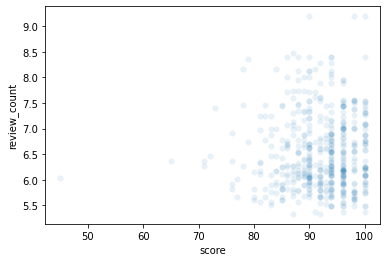

In [42]:
sns.scatterplot(x = fourpointfive.score, y = np.log(fourpointfive.review_count), alpha = 0.1)

<AxesSubplot:xlabel='score', ylabel='review_count'>

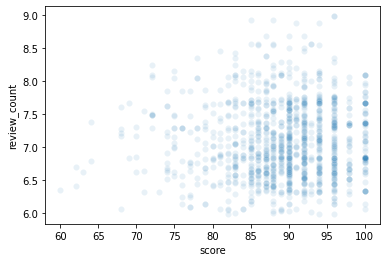

In [41]:
sns.scatterplot(x = four.score, y = np.log(four.review_count), alpha = 0.1)

<AxesSubplot:xlabel='score', ylabel='review_count'>

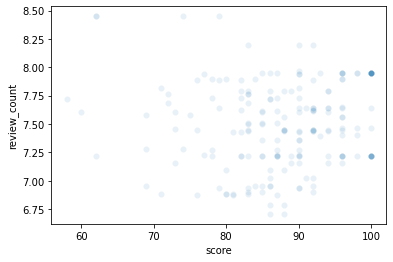

In [40]:
sns.scatterplot(x = threepointfive.score, y = np.log(threepointfive.review_count), alpha = 0.1)

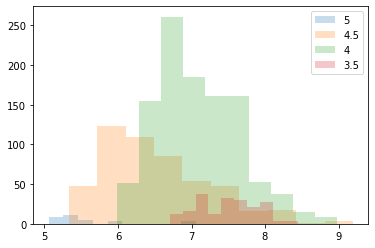

In [50]:
fig, ax = plt.subplots()
ax.hist(np.log(five.review_count), label = '5', alpha = 0.25)
ax.hist(np.log(fourpointfive.review_count), label = '4.5', alpha = 0.25)
ax.hist(np.log(four.review_count), label = '4', alpha = 0.25)
ax.hist(np.log(threepointfive.review_count), label = '3.5', alpha = 0.25)
ax.legend()

<AxesSubplot:xlabel='review_count', ylabel='Count'>

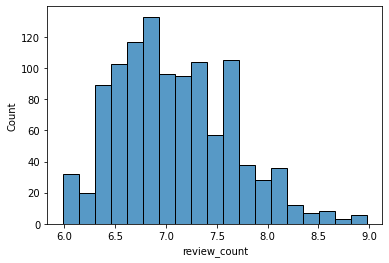

In [46]:
sns.histplot(np.log(four.review_count))

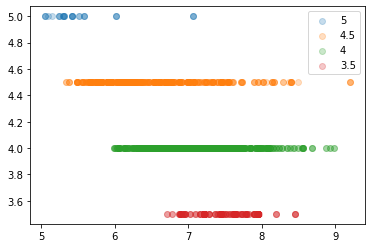

In [58]:
fig, ax = plt.subplots()
ax.scatter(np.log(five.review_count), five.rating ,label = '5', alpha = 0.25)
ax.scatter(np.log(fourpointfive.review_count), fourpointfive.rating ,label = '4.5', alpha = 0.25)
ax.scatter(np.log(four.review_count), four.rating, label = '4', alpha = 0.25)
ax.scatter(np.log(threepointfive.review_count), threepointfive.rating, label = '3.5', alpha = 0.25)
ax.legend()

In [59]:

# there is actually a negative correlation between review counts and rating - less review count is higher to have reviews - makes sense intuitively but not that you might think of at first

<ipython-input-79-1b5f6ca6162e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating2'] = df['rating'] + variation


<AxesSubplot:xlabel='rating2', ylabel='Count'>

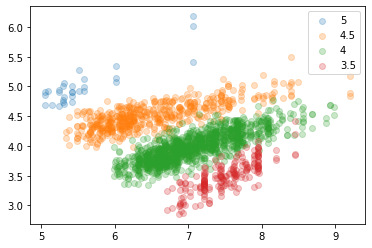

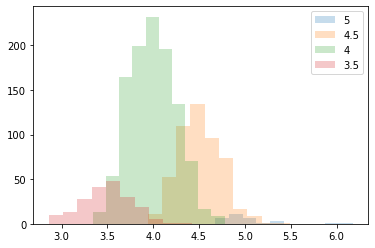

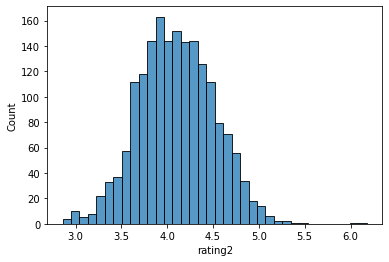

In [79]:
augment_bound = 1
randomness = 0.15

for df in [threepointfive, four, fourpointfive, five]:
    rating_class = df.copy()
    rating_class['log_review_count'] = np.log(rating_class['review_count'])
    avg_reviews = rating_class['log_review_count'].mean()
    range_deviations = max(rating_class['log_review_count']) - min(rating_class['log_review_count'])
    rating_class['deviation'] = (rating_class['log_review_count'] - avg_reviews)/range_deviations*augment_bound
    variation = np.random.normal(loc = rating_class['deviation'], scale = randomness)
    df['rating2'] = df['rating'] + variation


fig, ax = plt.subplots()
ax.scatter(np.log(five.review_count), five.rating2, label = '5', alpha = 0.25)
ax.scatter(np.log(fourpointfive.review_count), fourpointfive.rating2, label = '4.5', alpha = 0.25)
ax.scatter(np.log(four.review_count), four.rating2, label = '4', alpha = 0.25)
ax.scatter(np.log(threepointfive.review_count), threepointfive.rating2, label = '3.5', alpha = 0.25)
ax.legend()

fig2, ax2 = plt.subplots()
ax2.hist(five.rating2, label = '5', alpha = 0.25)
ax2.hist(fourpointfive.rating2, label = '4.5', alpha = 0.25)
ax2.hist(four.rating2, label = '4', alpha = 0.25)
ax2.hist(threepointfive.rating2, label = '3.5', alpha = 0.25)
ax2.legend()


new_data = pd.concat([threepointfive, four, fourpointfive, five])

fig3, ax3 = plt.subplots()
sns.histplot(new_data.rating2)